Training Accuracy: 0.9125
Test Accuracy: 0.9500


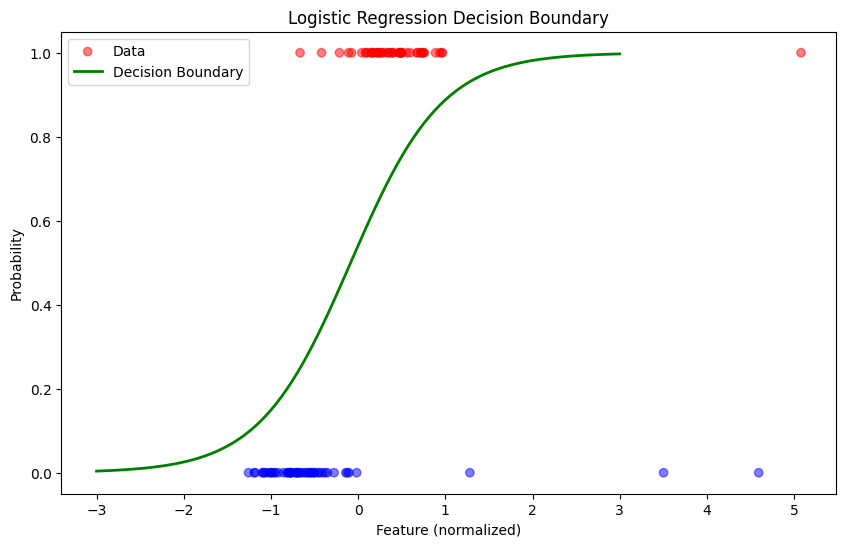

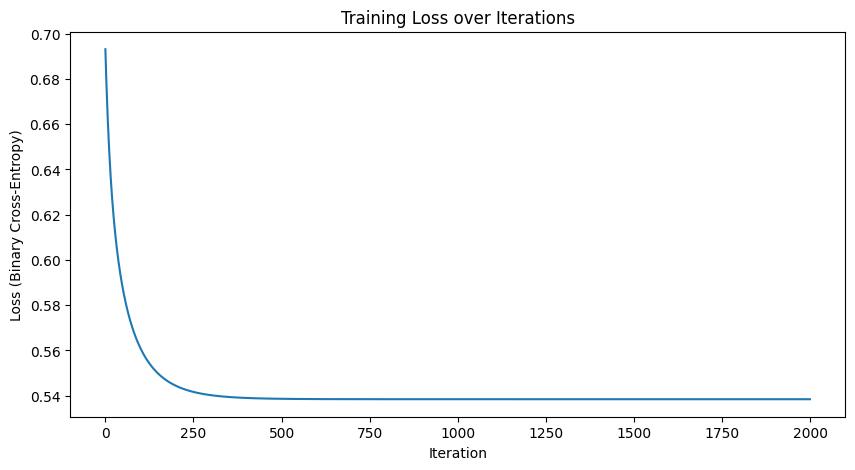

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            # Forward pass
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            # Compute loss (binary cross-entropy)
            loss = (-1/n_samples) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
            self.loss_history.append(loss)

            # Backward pass (compute gradients)
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# Load and prepare data
data = pd.read_csv('binary_classification_dataset.csv')
X = data['feature'].values.reshape(-1, 1)
y = data['label'].values

# Normalize features (important for gradient descent)
X = (X - np.mean(X)) / np.std(X)

# Add bias term (intercept)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split into train/test sets
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))
X_train, y_train = X[indices[:train_size]], y[indices[:train_size]]
X_test, y_test = X[indices[train_size:]], y[indices[train_size:]]

# Train model
model = LogisticRegression(learning_rate=0.1, n_iters=2000)
model.fit(X_train, y_train)

# Evaluate
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

print(f"Training Accuracy: {accuracy(y_train, train_preds):.4f}")
print(f"Test Accuracy: {accuracy(y_test, test_preds):.4f}")

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:,1], y, c=y, cmap='bwr', alpha=0.5, label='Data')
x_values = np.linspace(-3, 3, 100)
y_values = model.predict_proba(np.c_[np.ones(100), x_values])
plt.plot(x_values, y_values, 'g-', linewidth=2, label='Decision Boundary')
plt.xlabel('Feature (normalized)')
plt.ylabel('Probability')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(model.loss_history)
plt.title('Training Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.show()

In [3]:
pip install tensorflow


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Split into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42
)

# Scale pixel values to [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Reshape for traditional ML models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [5]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_flat, y_train)

    # Evaluate
    y_pred = model.predict(X_val_flat)
    acc = accuracy_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    cr = classification_report(y_val, y_pred)

    results[name] = {
        'model': model,
        'accuracy': acc,
        'confusion_matrix': cm,
        'classification_report': cr
    }

    print(f"{name} Validation Accuracy: {acc:.4f}")


Training Logistic Regression...
Logistic Regression Validation Accuracy: 0.9270

Training Random Forest...
Random Forest Validation Accuracy: 0.9720

Training XGBoost...
XGBoost Validation Accuracy: 0.9792

Training SVM...
SVM Validation Accuracy: 0.9807


In [6]:
# Reshape for CNN (add channel dimension)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_val_cnn = X_val.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train_cnn = to_categorical(y_train)
y_val_cnn = to_categorical(y_val)
y_test_cnn = to_categorical(y_test)

# Build CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train CNN
history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_cnn, y_val_cnn)
)

# Evaluate CNN
cnn_val_acc = cnn_model.evaluate(X_val_cnn, y_val_cnn, verbose=0)[1]
results['CNN'] = {
    'model': cnn_model,
    'accuracy': cnn_val_acc,
    'history': history
}
print(f"\nCNN Validation Accuracy: {cnn_val_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.8274 - loss: 0.5481 - val_accuracy: 0.9802 - val_loss: 0.0650
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.9700 - loss: 0.1021 - val_accuracy: 0.9865 - val_loss: 0.0478
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 55ms/step - accuracy: 0.9790 - loss: 0.0702 - val_accuracy: 0.9893 - val_loss: 0.0355
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 87s 61ms/step - accuracy: 0.9827 - loss: 0.0587 - val_accuracy: 0.9890 - val_loss: 0.0338
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 57ms/step - accuracy: 0.9866 - loss: 0.0440 - val_accuracy: 0.9898 - val_loss: 0.0317
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9870 - loss: 0.0404 - val_accuracy: 0.9907 - val_loss: 0.0331
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9885 - loss: 0.0327 - val_accuracy: 0.9912 - val_loss: 0.0321
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9909 - loss: 0.0285 - 


=== Model Comparison ===
Logistic Regression: 0.9270
Random Forest: 0.9720
XGBoost: 0.9792
SVM: 0.9807
CNN: 0.9922 (after 10 epochs)


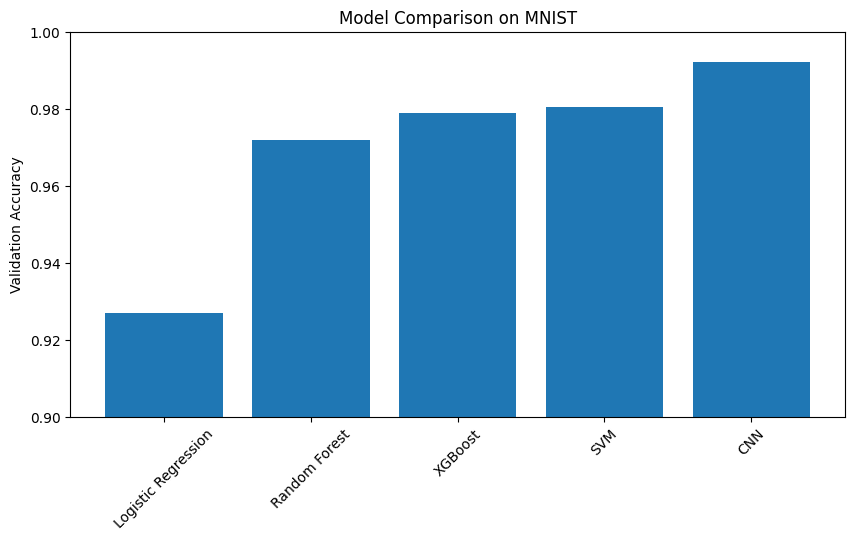

In [7]:
# Compare all models
print("\n=== Model Comparison ===")
for name, result in results.items():
    if name != 'CNN':
        print(f"{name}: {result['accuracy']:.4f}")
    else:
        print(f"{name}: {result['accuracy']:.4f} (after 10 epochs)")

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in names]
plt.bar(names, accuracies)
plt.title('Model Comparison on MNIST')
plt.ylabel('Validation Accuracy')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Add KNN to our models
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_flat, y_train)
y_pred_knn = knn.predict(X_val_flat)
knn_acc = accuracy_score(y_val, y_pred_knn)

results['KNN'] = {
    'model': knn,
    'accuracy': knn_acc,
    'confusion_matrix': confusion_matrix(y_val, y_pred_knn)
}

print(f"\nKNN Validation Accuracy: {knn_acc:.4f}")


KNN Validation Accuracy: 0.9735


In [4]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Load and preprocess data
@st.cache_data
def load_data():
    df = pd.read_csv("Customer_Segmentation_Dataset.csv")

    # Handle missing values
    df["Income"] = df["Income"].replace("", np.nan)
    df["Income"] = df["Income"].fillna(df["Income"].median())

    # Handle outliers in Income
    df["Income"] = df["Income"].clip(upper=df["Income"].quantile(0.99))

    # Encode categorical variables
    education_map = {"Basic": 1, "2n Cycle": 2, "Graduation": 3, "Master": 4, "PhD": 5}
    df["Education"] = df["Education"].map(education_map)

    # Simplify Marital_Status
    marital_map = {
        "Single": 0, "Divorced": 0, "Widow": 0, "Alone": 0, "Absurd": 0, "YOLO": 0,
        "Married": 1, "Together": 1
    }
    df["Marital_Status"] = df["Marital_Status"].map(marital_map)

    # Feature engineering
    current_year = 2025
    df["Age"] = current_year - df["Year_Birth"]
    df["Total_Spending"] = (
        df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] +
        df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
    )
    df["Total_Purchases"] = (
        df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
    )
    df["Total_Dependents"] = df["Kidhome"] + df["Teenhome"]
    df["Campaign_Success"] = (
        df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]]
        .sum(axis=1) / 6
    )

    return df

# Perform clustering
def perform_clustering(df, n_clusters, features):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[features])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df["Cluster"] = kmeans.fit_predict(scaled_data)

    return df, kmeans

# Compute elbow method
def compute_elbow_method(df, features, max_k=10):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[features])

    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertias.append(kmeans.inertia_)

    return inertias

# Streamlit app
st.title("Customer Segmentation Dashboard")
st.write("Analyze customer segments based on demographic and behavioral attributes.")

# Load data
df = load_data()

# Select features for clustering
features = [
    "Age", "Income", "Total_Spending", "Total_Purchases",
    "Total_Dependents", "Campaign_Success", "Education", "Marital_Status"
]

# User input for number of clusters
n_clusters = st.slider("Select Number of Clusters", min_value=2, max_value=10, value=4)

# Perform clustering
df_clustered, kmeans = perform_clustering(df, n_clusters, features)

# Elbow method plot
st.subheader("Elbow Method for Optimal Clusters")
inertias = compute_elbow_method(df, features)
fig_elbow = go.Figure()
fig_elbow.add_trace(go.Scatter(x=list(range(1, 11)), y=inertias, mode="lines+markers"))
fig_elbow.update_layout(
    title="Elbow Method",
    xaxis_title="Number of Clusters",
    yaxis_title="Inertia"
)
st.plotly_chart(fig_elbow)

# Scatter plot of clusters
st.subheader("Cluster Visualization")
fig_scatter = px.scatter(
    df_clustered,
    x="Income",
    y="Total_Spending",
    color="Cluster",
    title="Clusters by Income vs Total Spending",
    hover_data=["Age", "Total_Dependents"]
)
st.plotly_chart(fig_scatter)

# Segment characteristics
st.subheader("Segment Characteristics")
cluster_summary = df_clustered.groupby("Cluster")[features].mean().reset_index()
st.dataframe(cluster_summary)

# Bar chart of key features per cluster
st.subheader("Feature Distribution by Cluster")
fig_bar = go.Figure()
for feature in ["Age", "Income", "Total_Spending", "Campaign_Success"]:
    fig_bar.add_trace(
        go.Bar(
            x=cluster_summary["Cluster"],
            y=cluster_summary[feature],
            name=feature
        )
    )
fig_bar.update_layout(
    title="Average Feature Values per Cluster",
    xaxis_title="Cluster",
    yaxis_title="Value",
    barmode="group"
)
st.plotly_chart(fig_bar)

# Pie chart for segment sizes
st.subheader("Segment Size Distribution")
cluster_counts = df_clustered["Cluster"].value_counts().reset_index()
cluster_counts.columns = ["Cluster", "Count"]
fig_pie = px.pie(
    cluster_counts,
    names="Cluster",
    values="Count",
    title="Segment Size Distribution"
)
st.plotly_chart(fig_pie)

# Business insights
st.subheader("Business Insights")
for cluster in range(n_clusters):
    st.write(f"**Cluster {cluster}**:")
    cluster_data = cluster_summary[cluster_summary["Cluster"] == cluster]
    age = cluster_data["Age"].values[0]
    income = cluster_data["Income"].values[0]
    spending = cluster_data["Total_Spending"].values[0]
    campaign = cluster_data["Campaign_Success"].values[0]

    description = f"- **Average Age**: {age:.1f} years\n"
    description += f"- **Average Income**: ${income:.2f}\n"
    description += f"- **Average Total Spending**: ${spending:.2f}\n"
    description += f"- **Campaign Success Rate**: {campaign:.2%}\n"

    # Business relevance
    if income > df["Income"].mean() and spending > df["Total_Spending"].mean():
        description += "- **Business Implication**: High-value customers. Target with premium products and loyalty programs."
    elif campaign > 0.2:
        description += "- **Business Implication**: Responsive to campaigns. Focus on personalized promotions."
    else:
        description += "- **Business Implication**: Budget-conscious or less engaged. Offer discounts or entry-level products."

    st.markdown(description)

2025-05-21 16:33:37.087 No runtime found, using MemoryCacheStorageManager
2025-05-21 16:33:37.091 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 16:33:37.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 16:33:37.093 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 16:33:37.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 16:33:37.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 16:33:37.096 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 16:33:37.096 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 16:33:37.126 Thread 'MainThread':